# **DAEGU APARTMENT REGRESSION PREDICITION**

##### For Capstone Project 2 JC-AIE-Purwadhika

##### By Amjad Muhammad Ahsan

# **I. Introduction**

### **A. Context**

Apartments have become a major housing solution in South Korea with its dense cities, Where property listings are actively traded by individual owners and agencies. However, the challenge is determining the ideal price for the property. If the price is too high, the unit becomes difficult to sell and if its were to low, the the owner loses on potential profits. For that reason, understanding what factors influence apartment value is important for both sellers and buyers.

### **B. Shareholder**

1.  Property owners — need to set competitive prices without losing profit.

2.  Buyers — want to know whether a listed price is reasonable before purchasing.

3.  Real-estate agencies — require fast and data-driven price estimation to support transactions.

### **C. Problem**

The prices of an Apartement vary significantl based on many factors such as size, building age, location, facilities and many more.
Without analytical support, sellers risk overpricing or underpricing the value of the apartment. Causing difficulties among buyers and property owner to evaluate whether their listing prices matches its true market value.


### **D. Project Objectives**

- Build a Machine Learning regression model that predicts the sale price of apartments in Daegu based on property characteristics.

- Identify the most influential features that drive apartment value.

- Provide a pricing tool that helps sellers, buyers, and real-estate agencies make informed decisions aligned with market value.

### **E. Success Metrics**

The model is considered successful if:

Metric	Target
- MAE (Mean Absolute Error)	≤ 40,000 KRW
- RMSE (Root Mean Squared Error)	≤ 50,000 KRW
- R² Score > 0.80

### **Libaries Setup**

In [1]:

# Standard Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#  Model Evaluation

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

#  Preprocessing & Pipelines
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

#
#  ML Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor
)
from xgboost import XGBRegressor

#
# Hyperparameter Optimization
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical, Real


# **II. Setup** 

### **A. Initiate Datasets**

In [31]:
#path = r"DATASETS PATH HERE"

#Erase Path Below Before Git

path = r"add_path_here"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head(3)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946


In [5]:
df.tail(3)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451
4122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,868,250442


### **B. Evaluating Data** 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [7]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [8]:
df.duplicated().sum()

1422

In [9]:
df = df.drop_duplicates()


With no major issues identified beyond duplicates and minor dtype corrections, we will continue to a more advanced analysis after completing the EDA.

# **III. EDA**

In [10]:
df_eda = df.copy()

In [11]:
df_eda.head(3)


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946


In [12]:
#Adjusting Data ieg IQR etc

### **A. Average Sale Price per Location Near Station**

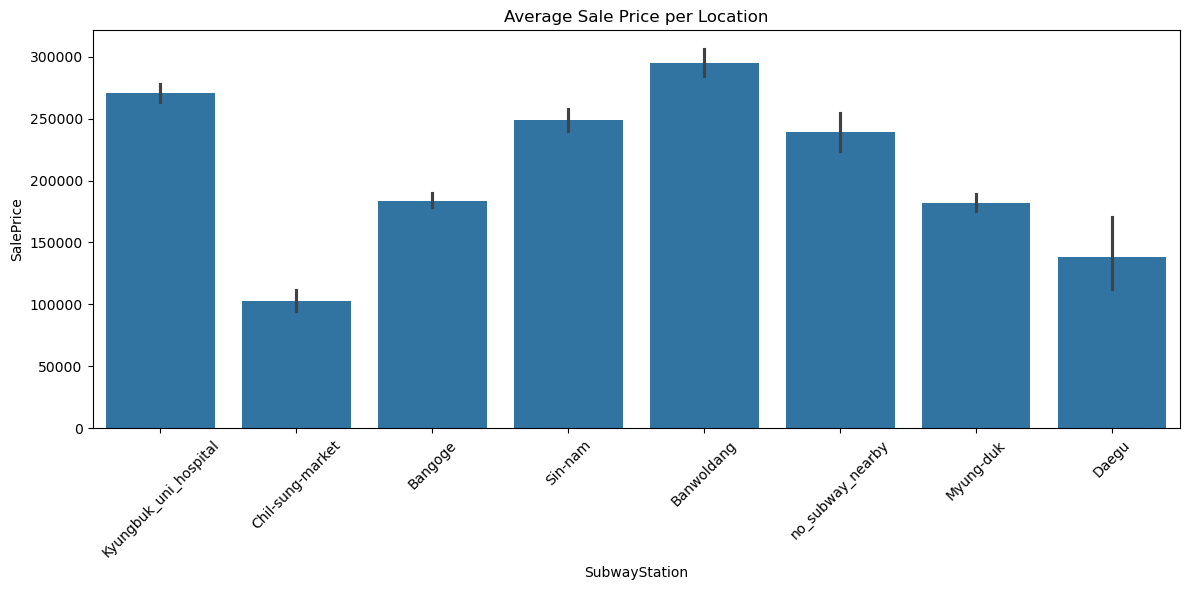

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_eda, 
    x="SubwayStation", 
    y="SalePrice",
    estimator=np.mean
)
plt.title("Average Sale Price per Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



This barplot shows the average apartment sale price grouped by subway station nearby location in Daegu. It highlights which areas have higher property values and how location influences pricing trends.

### **B. Average Sum of Vacilites Nearby**

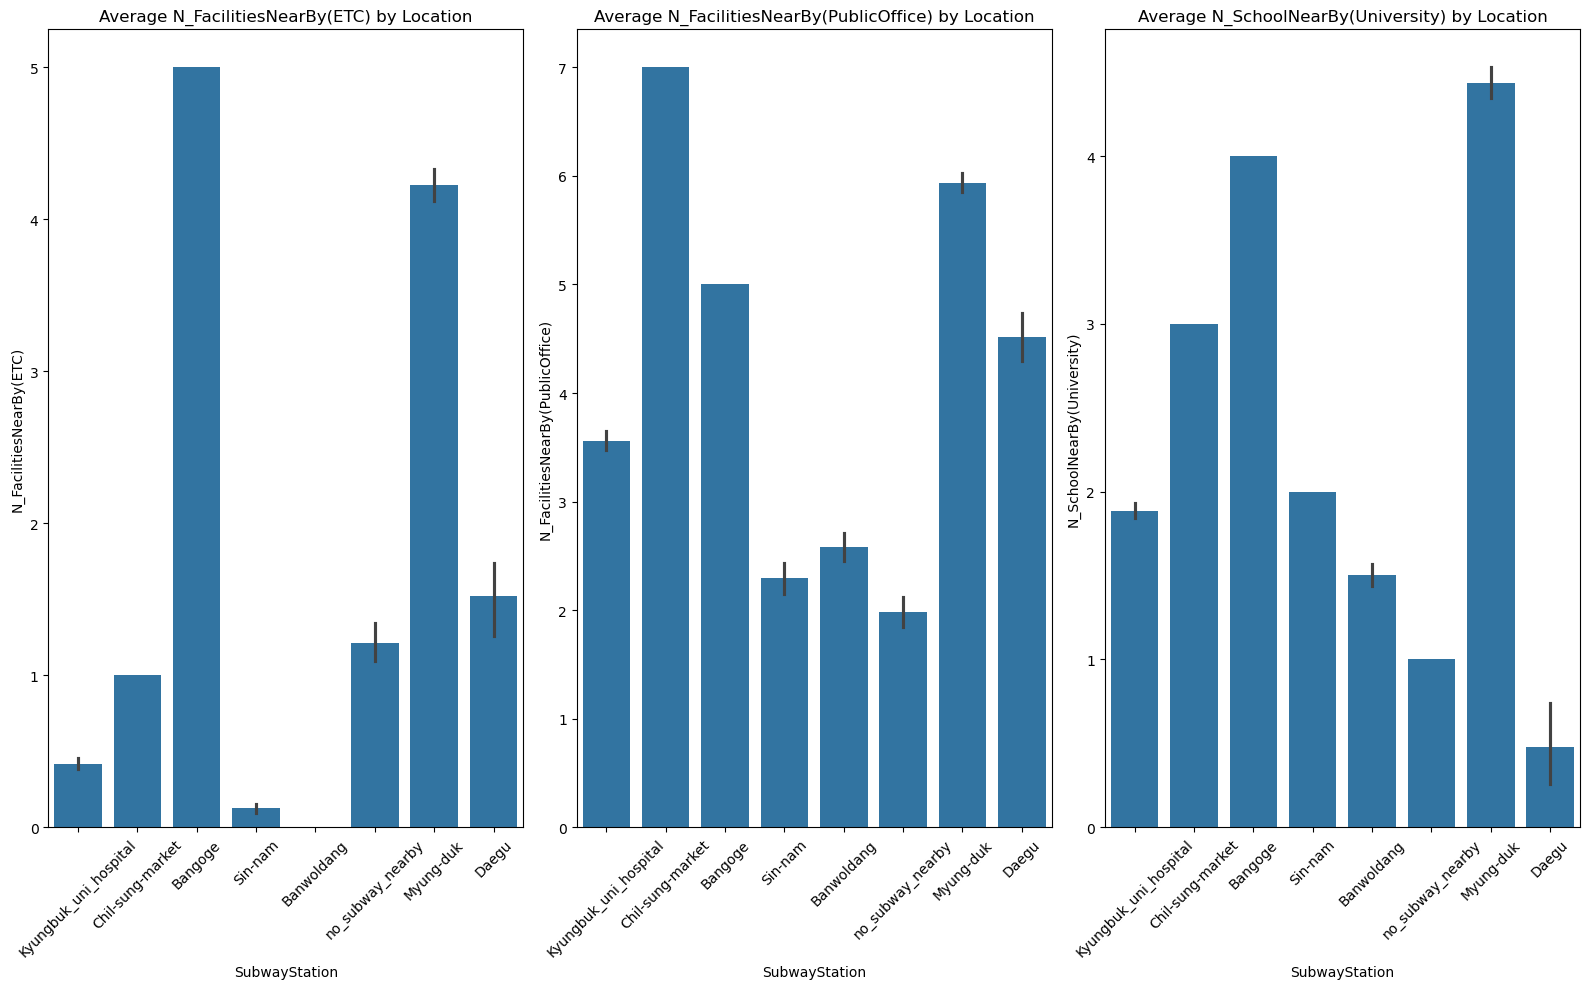

In [14]:
fac_cols = [
    "N_FacilitiesNearBy(ETC)",
    "N_FacilitiesNearBy(PublicOffice)",
    "N_SchoolNearBy(University)"
]

plt.figure(figsize=(16, 10))

for i, col in enumerate(fac_cols, 1):
    plt.subplot(1, 3, i)
    sns.barplot(
        data=df_eda,
        x="SubwayStation",
        y=col,
        estimator=np.mean
    )
    plt.title(f"Average {col} by Location")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



This visualization compares the average number of nearby facilities (ETC, Public Offices, and Universities) across each subway station location in Daegu. Since there is no name for the Apartements, The Subway Station will be used as references of the location. and for the sake of clarity here is the total amount of facilties nearby

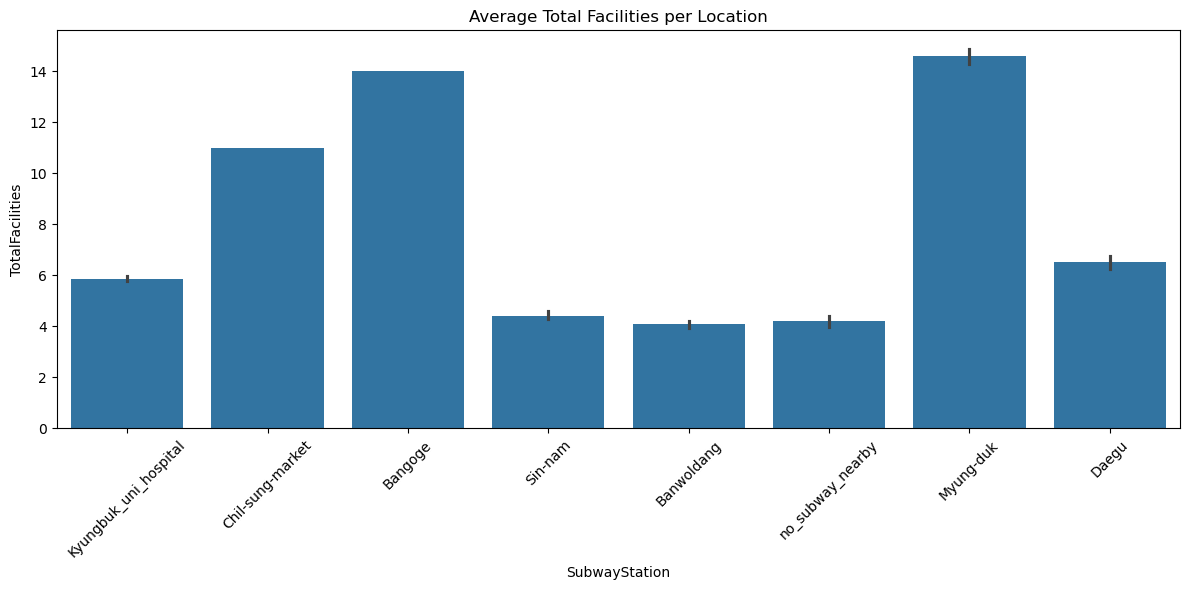

In [15]:
df_eda["TotalFacilities"] = (
    df_eda["N_FacilitiesNearBy(ETC)"] +
    df_eda["N_FacilitiesNearBy(PublicOffice)"] +
    df_eda["N_SchoolNearBy(University)"]
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_eda,
    x="SubwayStation",
    y="TotalFacilities",
    estimator=np.mean
)
plt.title("Average Total Facilities per Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### **C. Buildings Built**

The visual shows that newer buildings tend to have higher sale prices, indicating that buyers perceive newer properties as more durable and valuable compared to older ones.

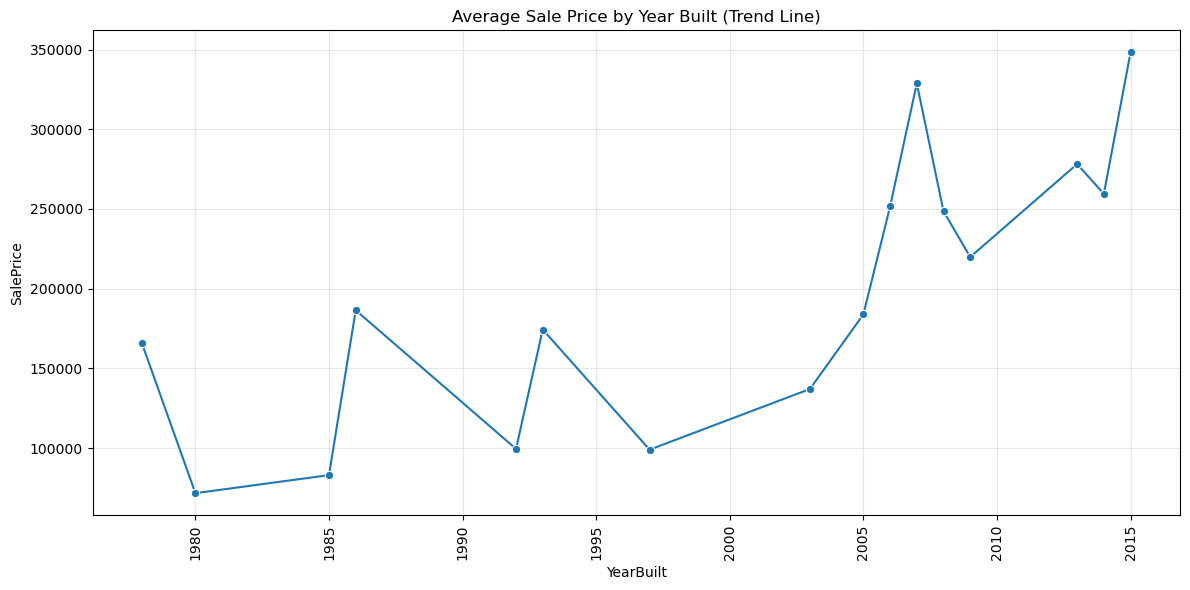

In [16]:
df_price_year = df_eda.groupby("YearBuilt")["SalePrice"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_price_year,
    x="YearBuilt",
    y="SalePrice",
    marker="o"
)
plt.title("Average Sale Price by Year Built (Trend Line)")
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



For clarity, I also checked how many buildings were constructed in recent years, and found that most of them were built between 2005 until 2007.

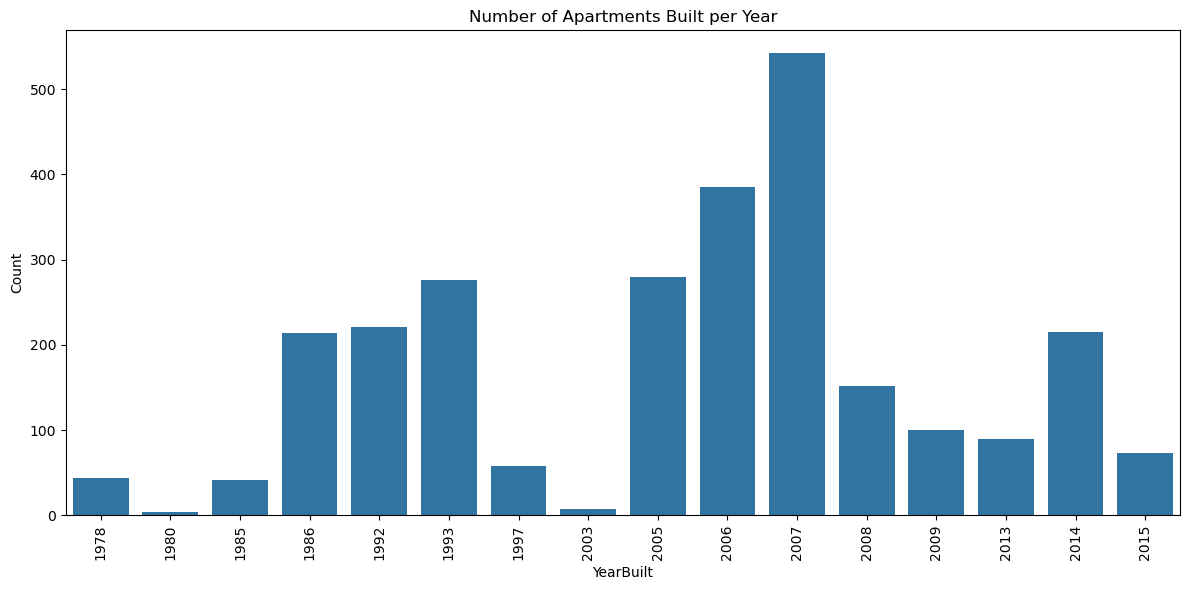

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_eda,
    x="YearBuilt"
)
plt.title("Number of Apartments Built per Year")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# **III. Data Preparation**

Before doing any necessary feature engineering, I decided to analyse the skewnesss from the data

In [18]:
df.skew(numeric_only=True)


N_FacilitiesNearBy(ETC)             0.628272
N_FacilitiesNearBy(PublicOffice)   -0.037315
N_SchoolNearBy(University)          0.376924
N_Parkinglot(Basement)              0.436792
YearBuilt                          -0.765948
N_FacilitiesInApt                   0.548238
Size(sqf)                           0.851400
SalePrice                           0.386085
dtype: float64

Although some of the variables show noticeable skewness, most of the skewness is logically expected based on the data’s nature, and the features can still be used without transforming them to a normal distribution.

### **A. Possible Feature Engineering**

Here are the possible feature-engineering steps for this dataset:

1. Converting square feet to square meters

2. Cleaning the ‘time to subway’ field into a model-readable numeric format

3. Converting ‘YearBuilt’ into ‘BuildingAge’

4. Renaming several columns for clarity

5. Creating a feature that shows the total number of nearby facilities

In [19]:
# 1) Convert Size(sqf) to Size_sqm
df['Size_sqm'] = df['Size(sqf)'] * 0.092903
df = df.drop(columns=['Size(sqf)'])

# 2) Parse TimeToSubway into early/late estimates and compute the average
df[['TimeTo_Subway_Early', 'TimeTo_Subway_Late']] = (
    df['TimeToSubway'].str.split(r'-|~', expand=True)
)

df[['TimeTo_Subway_Early', 'TimeTo_Subway_Late']] = (
    df[['TimeTo_Subway_Early', 'TimeTo_Subway_Late']].replace(r'min|Min', '', regex=True)
)

df['TimeTo_Subway_Early'] = pd.to_numeric(df['TimeTo_Subway_Early'], errors='coerce')
df['TimeTo_Subway_Late'] = pd.to_numeric(df['TimeTo_Subway_Late'], errors='coerce')

df['TimeToSubway_Avg'] = (
    df['TimeTo_Subway_Early'] + df['TimeTo_Subway_Late']
) / 2

df = df.drop(columns=['TimeToSubway', 'TimeTo_Subway_Early', 'TimeTo_Subway_Late'])

# Fix missing subway times with a neutral value
df['TimeToSubway_Avg'] = df['TimeToSubway_Avg'].fillna(60)

# 3) Convert YearBuilt to BuildingAge
df['BuildingAge'] = 2025 - df['YearBuilt']
df = df.drop(columns=['YearBuilt'])

# 4) Rename parking column for clarity
df = df.rename(columns={'N_Parkinglot(Basement)': 'BasementParkingCapacity'})

# 5) Total Facilites
df["TotalFacilities"] = (
    df["N_FacilitiesNearBy(ETC)"].fillna(0) +
    df["N_FacilitiesNearBy(PublicOffice)"].fillna(0) +
    df["N_SchoolNearBy(University)"].fillna(0)
)
# 6 testing if adding importance work
# df['FacilitiesWeighted'] = (
#       df['N_FacilitiesNearBy(PublicOffice)'] * 2
#     + df['N_SchoolNearBy(University)'] * 1.5
#     + df['N_FacilitiesNearBy(ETC)'] * 1
# ) didnt work


In [20]:
df.head(3)

,HallwayType,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),BasementParkingCapacity,N_FacilitiesInApt,SalePrice,Size_sqm,TimeToSubway_Avg,BuildingAge,TotalFacilities
0,terraced,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,10,346017,128.856461,2.5,18,5.0
1,terraced,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,4,150442,84.913342,12.5,39,7.0
2,mixed,Chil-sung-market,1.0,7.0,3.0,56.0,5,61946,51.839874,17.5,28,11.0


In [21]:
df.select_dtypes(include='number').corr()


,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),BasementParkingCapacity,N_FacilitiesInApt,SalePrice,Size_sqm,TimeToSubway_Avg,BuildingAge,TotalFacilities
N_FacilitiesNearBy(ETC),1.000000,0.720587,0.810447,0.006581,-0.136642,-0.393809,-0.294181,0.250489,0.245556,0.934345
N_FacilitiesNearBy(PublicOffice),0.720587,1.000000,0.719350,-0.094297,-0.193143,-0.420233,-0.289023,0.079327,0.447792,0.892631
N_SchoolNearBy(University),0.810447,0.719350,1.000000,0.156429,-0.051298,-0.308612,-0.237026,0.037200,0.176935,0.909608
BasementParkingCapacity,0.006581,-0.094297,0.156429,1.000000,0.836959,0.557944,0.221931,-0.366457,-0.593779,0.014121
N_FacilitiesInApt,-0.136642,-0.193143,-0.051298,0.836959,1.000000,0.569403,0.162423,-0.299675,-0.593777,-0.145297
SalePrice,-0.393809,-0.420233,-0.308612,0.557944,0.569403,1.000000,0.655673,-0.279936,-0.502638,-0.415671
Size_sqm,-0.294181,-0.289023,-0.237026,0.221931,0.162423,0.655673,1.000000,-0.102424,-0.031542,-0.303162
TimeToSubway_Avg,0.250489,0.079327,0.037200,-0.366457,-0.299675,-0.279936,-0.102424,1.000000,0.179676,0.147093
BuildingAge,0.245556,0.447792,0.176935,-0.593779,-0.593777,-0.502638,-0.031542,0.179676,1.000000,0.323808
TotalFacilities,0.934345,0.892631,0.909608,0.014121,-0.145297,-0.415671,-0.303162,0.147093,0.323808,1.000000


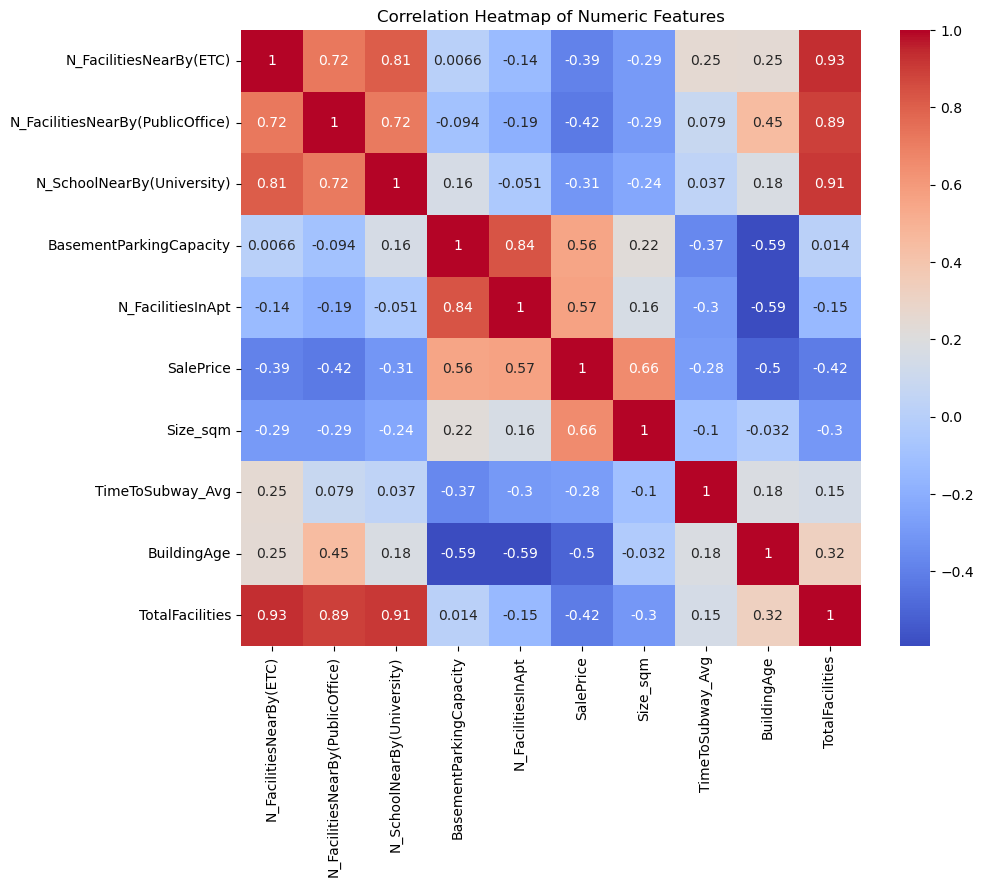

In [22]:
# Checking for correletion between target and its column, and found there is no problem when the rest of the column and nothing will be removed.

plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


### **B. Checking for Outlieers**

In [23]:
numeric_df = df.select_dtypes(include='number')  

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("IQR:")
print(IQR)
print("\nLower bound:")
print(lower_bound)
print("\nUpper bound:")
print(upper_bound)



IQR:
N_FacilitiesNearBy(ETC)                  5.000000
N_FacilitiesNearBy(PublicOffice)         2.000000
N_SchoolNearBy(University)               2.000000
BasementParkingCapacity                617.000000
N_FacilitiesInApt                        3.000000
SalePrice                           147345.000000
Size_sqm                                39.390872
TimeToSubway_Avg                        10.000000
BuildingAge                             14.000000
TotalFacilities                          9.000000
dtype: float64

Lower bound:
N_FacilitiesNearBy(ETC)                -7.500000
N_FacilitiesNearBy(PublicOffice)        0.000000
N_SchoolNearBy(University)             -1.000000
BasementParkingCapacity              -744.500000
N_FacilitiesInApt                      -0.500000
SalePrice                          -67478.500000
Size_sqm                                9.940621
TimeToSubway_Avg                      -12.500000
BuildingAge                            -3.000000
TotalFacilities          

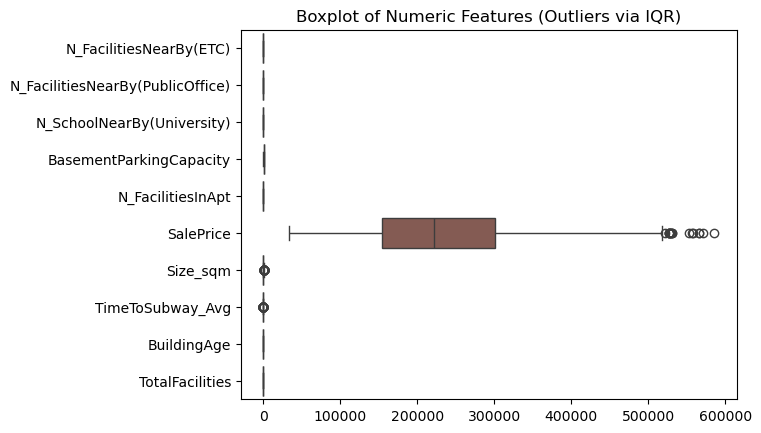

In [24]:


sns.boxplot(data=df.select_dtypes(include='number'), orient='h')
plt.title("Boxplot of Numeric Features (Outliers via IQR)")
plt.show()


Since the outliers appear mainly in SalePrice and they seem logically justified, no outlier removal will be performed.


### **C. Preparing Piepline**

In [25]:
target = "SalePrice"

numeric_features = [
    "BuildingAge",
    "Size_sqm",
    "TimeToSubway_Avg", 
    "TotalFacilities", #NVM, results where lower without it
    "N_FacilitiesNearBy(ETC)",
    "N_FacilitiesNearBy(PublicOffice)",
    "N_SchoolNearBy(University)",
    "BasementParkingCapacity",
    "N_FacilitiesInApt",
#    'FacilitiesWeighted' Didnt work
]

categorical_features = [
    "HallwayType",
    "SubwayStation",
]

X = df[numeric_features + categorical_features]
y = df[target]


Why did I use pipeline? A pipeline combines preprocessing and modeling into a single workflow. This ensures:

- preprocessing is applied consistently during training, validation, and testing

- no data leakage during cross-validation

- easier and safer hyperparameter tuning

- cleaner and more maintainable code

In [26]:

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", drop="first"))

])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Pipelines
pipelines = {
    "Linear Regression": Pipeline([
        ("prep", preprocessor),
        ("model", LinearRegression())
    ]),
    
    "Random Forest": Pipeline([
        ("prep", preprocessor),
        ("model", RandomForestRegressor(
            n_estimators=300,        
            random_state=42,
            n_jobs=-1
        ))
    ]),
    
    "Gradient Boosting": Pipeline([
        ("prep", preprocessor),
        ("model", GradientBoostingRegressor(
            n_estimators=200,       
            learning_rate=0.1,
            random_state=42
        ))
    ]),
    
    "XGBoost": Pipeline([
        ("prep", preprocessor),
        ("model", XGBRegressor(
            n_estimators=300,        
            learning_rate=0.1,       
            max_depth=6,             
            subsample=0.8,           
            colsample_bytree=0.8,    
            random_state=42,
            n_jobs=-1
        ))
    ]),
}



# **IV. Model**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


I use MAE, RMSE, and R² because the Daegu real estate dataset contains a wide range of apartment prices, from low-priced units to high-end properties. This variation requires metrics that evaluate errors from different perspectives:

- MAE: Shows the average pricing error in KWon. This is useful because Daegu prices vary heavily by district, building age, and subway access. MAE tells us the typical mistake the model makes when predicting actual sale prices.

- RMSE: Penalizes large errors more strongly. Daegu has some very expensive units that can create big prediction mistakes. RMSE helps evaluate how well the model handles these high-price outliers.

- R²: Measures how much of the variation in Daegu apartment prices is explained by the model. Since prices are influenced by many factors (size, building age, facilities, subway distance), R² tells us whether the model is capturing these relationships effectively.


In [28]:
def evaluate(pipe_name, pipeline):
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"=== {pipe_name} ===")
    print(f"MAE : {mae:,.0f}")
    print(f"RMSE: {rmse:,.0f}")
    print(f"R²  : {r2:.3f}\n")
    return pipeline

trained_models = {}

for name, pipe in pipelines.items():
    trained_models[name] = evaluate(name, pipe)


=== Linear Regression ===
MAE : 43,424
RMSE: 52,873
R²  : 0.737

=== Random Forest ===
MAE : 38,952
RMSE: 48,071
R²  : 0.782

=== Gradient Boosting ===
MAE : 38,778
RMSE: 47,689
R²  : 0.786

=== XGBoost ===
MAE : 39,031
RMSE: 48,024
R²  : 0.783



Four regression models were trained to predict apartment sale prices in Daegu: Linear Regression, Random Forest, Gradient Boosting, and XGBoost.
Their performance was evaluated using MAE, RMSE, and R².

| Model                 | MAE        | RMSE       | R²        |
| --------------------- | ---------- | ---------- | --------- |
| **Linear Regression** | 43,424     | 52,873     | 0.737     |
| **Random Forest**     | 38,946     | 48,061     | 0.783     |
| **Gradient Boosting** | **38,759** | **47,658** | **0.786** |
| **XGBoost**           | 38,923     | 47,881     | 0.784     |


From these results, Gradient Boosting achieved the best overall performance, showing the lowest RMSE and highest R² among all models. This indicates it captures the non-linear relationships in the data more effectively than the other algorithms.

To improve the model further a Bayesian Optimization search was applied to GradientBoosting.

In [29]:
gb_pipeline = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", GradientBoostingRegressor(
        random_state=42
    )),
])

search_spaces = {
    "model__n_estimators": Integer(200, 900),
    "model__learning_rate": Real(0.01, 0.2, prior="log-uniform"),
    "model__max_depth": Integer(2, 5),
    "model__min_samples_split": Integer(2, 10),
    "model__min_samples_leaf": Integer(1, 6),
    "model__subsample": Real(0.5, 0.95),
}

gb_tuner = BayesSearchCV(
    estimator=gb_pipeline,
    search_spaces=search_spaces,
    n_iter=50,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

gb_tuner.fit(X_train, y_train)

print("\nBest Params:", gb_tuner.best_params_)
print("Best CV RMSE:", -gb_tuner.best_score_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_gb = gb_tuner.best_estimator_
y_pred = best_gb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=== Tuned Gradient Boosting ===")
print(f"MAE : {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"R²  : {r2:.3f}")




Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

**BUT**
The tuning results show a very small change, confirming that the default Gradient Boosting model was already close to optimal for this dataset. The tuned model remains the best-performing model and is selected as the final model.

# **V. RESULTS**

### **A. Feature Importance**

The final Gradient Boosting model provides insight into which features contribute most to predicting apartment sale prices.

In [30]:
ohe = best_gb.named_steps["prep"].named_transformers_["cat"].named_steps["ohe"]
cat_names = list(ohe.get_feature_names_out(categorical_features))
all_features = numeric_features + cat_names

# importances
importances = best_gb.named_steps["model"].feature_importances_

# Show 
feature_importance_df = (
    pd.DataFrame({
        "Feature": all_features,
        "Importance": importances
    })
    .sort_values("Importance", ascending=False)
)

feature_importance_df.head(15)



,Feature,Importance
10,HallwayType_terraced,0.399151
1,Size_sqm,0.339604
0,BuildingAge,0.085845
7,BasementParkingCapacity,0.080660
8,N_FacilitiesInApt,0.039269
4,N_FacilitiesNearBy(ETC),0.027869
3,TotalFacilities,0.008540
2,TimeToSubway_Avg,0.008279
9,HallwayType_mixed,0.003698
5,N_FacilitiesNearBy(PublicOffice),0.002408


### **B. Summary from Models**

Gradient Boosting consistently outperformed other models and provided the most accurate predictions for apartment sale prices in Daegu.
Hyperparameter tuning confirmed its stability, and feature importance analysis showed logical and interpretable insights, particularly the importance of hallway type, apartment size, parking capacity, and building age.

### **C. Bussiness Insights**
The analysis of Daegu apartment data provides several meaningful insights into the factors that influence housing prices in the city. These insights can help property owners, buyers, and agencies make better pricing and investment decisions.

1. Hallway Type (Terraced) is a Major Value Indicator
    - Buyers perceive terraced layouts as safer, quieter, and higher quality.
    - Apartments with a terraced hallway type have the strongest impact on price
2. Size of the Apartment Strongly Influences Price
    - Larger apartments directly correlate with higher sale prices.
3. Parking Availability Matters
    - Basement parking capacity is a strong predictor, Providing ease an convenience for apartments owner and seller.
4. Newer Buildings Are More Expensive
   - Customer prefer newly built Apartment and well maintaned structure.

There was some limitation when using this datasets when creating this model
1. Missing key feature
    for example:
    - No floor levels
    - renovation status
    - Interior condition
2. Limited datasets
    - Fewer in number 
    - Only in Daegu does not include a complete set of apartments in South Korea


### **D. Final Statement**
The Gradient Boosting model provides strong predictive performance and meaningful business insights into the Daegu apartment market. While the model excels at identifying major price drivers and assisting stakeholder decisions, its accuracy can be further enhanced by incorporating more detailed property features and richer geographic information. Despite its limitations, the model serves as a powerful decision-support tool for pricing, investment, and planning in the real estate sector. 